In [787]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn import metrics
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [788]:
df=pd.read_csv("Dataset.csv")

# Data Preprocessing

In [789]:
df=df.dropna()

In [790]:
# Encoding of categorical variables
df = pd.get_dummies(df, columns=['Col2','Col3','Col7','Col9','Col11','Col12','Col13'], drop_first=True)

In [791]:
df.shape

(297, 21)

In [792]:
df.columns

Index(['Col1', 'Col4', 'Col5', 'Col6', 'Col8', 'Col10', 'Target', 'Col2_1',
       'Col3_nang', 'Col3_nont', 'Col3_t', 'Col7_1', 'Col7_2', 'Col9_1',
       'Col11_2', 'Col11_3', 'Col12_1', 'Col12_2', 'Col12_3', 'Col13_n',
       'Col13_r'],
      dtype='object')

In [793]:
df['Target']=df['Target'].replace(['A','B'],[1,0])

# Normalizing

In [794]:
features = df[['Col1', 'Col4', 'Col5', 'Col8', 'Col10']]
for feature_name in features.columns:
    max_value = features[feature_name].max()
    min_value = features[feature_name].min()
    df[feature_name] = (features[feature_name] - min_value) / (max_value - min_value)

# Outliers 

In [795]:
### Taking Subset of df for outlier removal
df1=df[['Col1', 'Col4', 'Col5', 'Col8', 'Col10']]

In [796]:
for i in df1.columns:
    df=df[np.abs(df[i]-df[i].mean()) <= (3*df[i].std())]

In [797]:
df.shape

(288, 21)

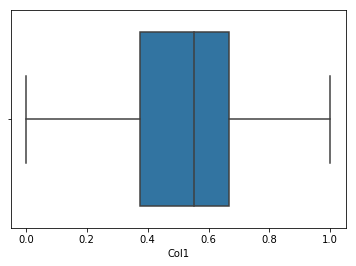

In [798]:
import seaborn as sns
sns.boxplot(x=df['Col1'])

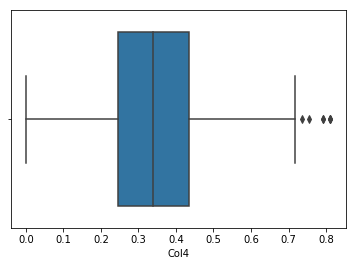

In [799]:
sns.boxplot(x=df['Col4'])

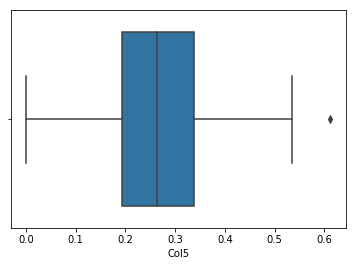

In [800]:
sns.boxplot(x=df['Col5'])

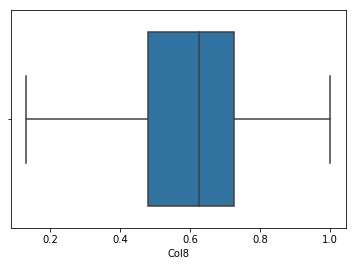

In [801]:
sns.boxplot(x=df['Col8'])

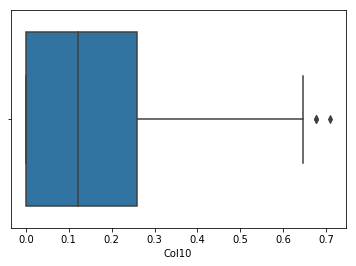

In [802]:
sns.boxplot(x=df['Col10'])

# Q 1) Get the relationship (for eg correlation) between each independent feature with the Target variable and plot corresponding graphs wherever required.

# Solution:1

In [803]:
# calculate spearman's correlation
best_features=[]
worst_features=[]
for i in df.columns:
    corr, _ = spearmanr(df['Target'], df[i])
    print('spearmanr correlation of '+ i + ' with Target: %.3f' % corr)
    if abs(corr)>0.100:
        best_features.append(i)
    elif abs(corr)<0.100:
        worst_features.append(i)
        

spearmanr correlation of Col1 with Target: -0.244
spearmanr correlation of Col4 with Target: -0.111
spearmanr correlation of Col5 with Target: -0.121
spearmanr correlation of Col6 with Target: -0.010
spearmanr correlation of Col8 with Target: 0.430
spearmanr correlation of Col10 with Target: -0.404
spearmanr correlation of Target with Target: 1.000
spearmanr correlation of Col2_1 with Target: -0.295
spearmanr correlation of Col3_nang with Target: 0.288
spearmanr correlation of Col3_nont with Target: 0.256
spearmanr correlation of Col3_t with Target: 0.087
spearmanr correlation of Col7_1 with Target: -0.071
spearmanr correlation of Col7_2 with Target: -0.157
spearmanr correlation of Col9_1 with Target: -0.425
spearmanr correlation of Col11_2 with Target: -0.363
spearmanr correlation of Col11_3 with Target: -0.025
spearmanr correlation of Col12_1 with Target: -0.246
spearmanr correlation of Col12_2 with Target: -0.269
spearmanr correlation of Col12_3 with Target: -0.198
spearmanr correla

In [804]:
print('best_features',best_features)
print('worst_features',worst_features)

best_features ['Col1', 'Col4', 'Col5', 'Col8', 'Col10', 'Target', 'Col2_1', 'Col3_nang', 'Col3_nont', 'Col7_2', 'Col9_1', 'Col11_2', 'Col12_1', 'Col12_2', 'Col12_3', 'Col13_n', 'Col13_r']
worst_features ['Col6', 'Col3_t', 'Col7_1', 'Col11_3']


In [805]:
df.shape

(288, 21)

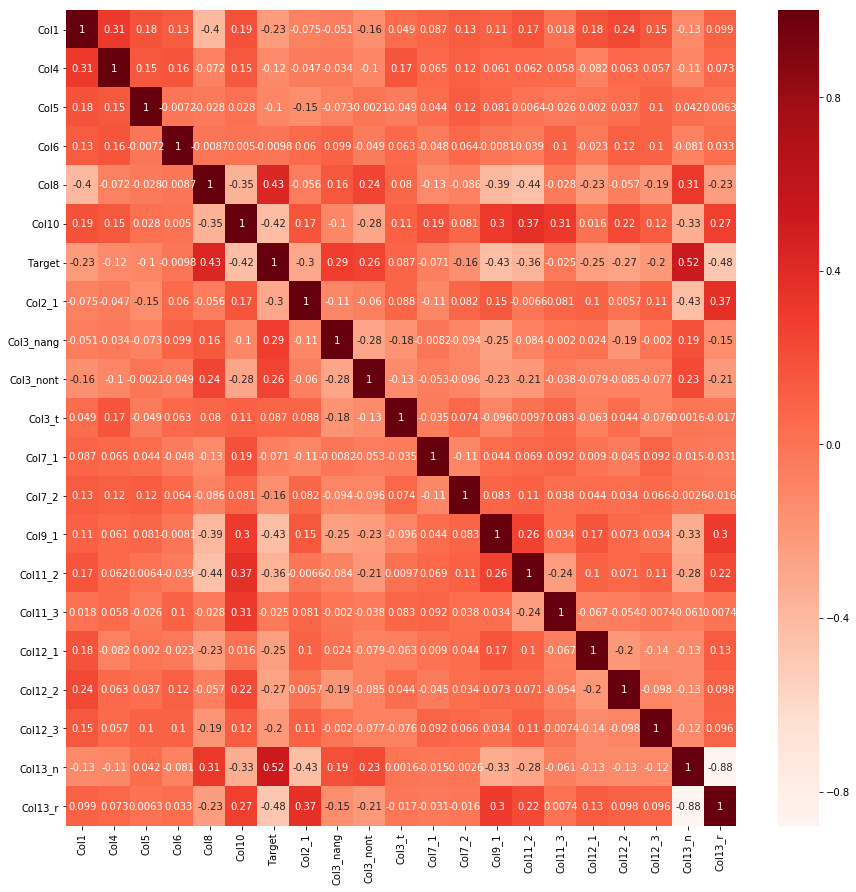

In [806]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True, cmap=plt.cm.Reds)

In [807]:
Y=df['Target']

In [808]:
X= df[['Col1', 'Col4', 'Col5', 'Col8', 'Col10','Col2_1', 'Col3_nang', 'Col3_nont', 'Col7_2', 'Col9_1', 'Col11_2', 'Col12_1', 'Col12_2', 'Col12_3', 'Col13_n', 'Col13_r']]

In [860]:
X.columns

Index(['Col1', 'Col4', 'Col5', 'Col8', 'Col10', 'Col2_1', 'Col3_nang',
       'Col3_nont', 'Col7_2', 'Col9_1', 'Col11_2', 'Col12_1', 'Col12_2',
       'Col12_3', 'Col13_n', 'Col13_r'],
      dtype='object')

In [861]:
X.shape

(288, 16)

In [811]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

# Q 2) Use all the rows as training dataset and fit three different types of classifiers on this data. Do the hyperparameter tuning wherever required to get the best possible version of that classifier for this dataset.

# Solution:2

# Modelling using LogisticRegression

In [812]:
lr = LogisticRegression()

In [813]:
model_lr=lr.fit(X_train,Y_train)

In [814]:
y_pred_lr = model_lr.predict(X_test)

In [815]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [816]:
### Confusion Matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred_lr))
print(classification_report(Y_test,y_pred_lr))

[[35  4]
 [ 6 42]]
             precision    recall  f1-score   support

          0       0.85      0.90      0.88        39
          1       0.91      0.88      0.89        48

avg / total       0.89      0.89      0.89        87



In [817]:
# Model Precision
print("Precision:",metrics.precision_score(Y_test, y_pred_lr))

# Model Recall
print("Recall:",metrics.recall_score(Y_test, y_pred_lr))

Precision: 0.9130434782608695
Recall: 0.875


# Modelling using Random Forest

In [819]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [30,50,80],
    'max_features': [2, 3],
    'min_samples_leaf': [4, 5,7],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}

In [820]:
# Model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [821]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.4min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 100}

In [822]:
print(grid_search.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [742]:
X.shape

(288, 16)

In [826]:
rfc=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs= 1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [827]:
model_rf=rfc.fit(X_train,Y_train)

In [828]:
model_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [829]:
y_pred_rf = model_rf.predict(X_test)

In [830]:
### Accuracy
print('Accuracy of Random Forest on test set: {:.2f}'.format(rfc.score(X_test,Y_test)))

Accuracy of Random Forest on test set: 0.86


In [831]:
# Model Precision
print("Precision:",metrics.precision_score(Y_test, y_pred_rf))

# Model Recall
print("Recall:",metrics.recall_score(Y_test, y_pred_rf))

Precision: 0.8913043478260869
Recall: 0.8541666666666666


In [832]:
### Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred_rf))
print(classification_report(Y_test,y_pred_rf))

[[34  5]
 [ 7 41]]
             precision    recall  f1-score   support

          0       0.83      0.87      0.85        39
          1       0.89      0.85      0.87        48

avg / total       0.86      0.86      0.86        87



# Modelling using SVM

In [833]:
from sklearn.model_selection import GridSearchCV

In [834]:
clf = SVC()

In [835]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'linear', 'sigmoid']}

In [836]:
grid_search = GridSearchCV(clf,param_grid,refit=True,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ..........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ................. C=0.1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ................. C=0.1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ................. C=0.1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] 

[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    1.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [837]:
print(grid_search.best_estimator_)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [851]:
clf = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [852]:
# fitting x samples and y classes 
model_svm=clf.fit(X_train,Y_train) 

In [853]:
y_pred_svm=model_svm.predict(X_test)

In [854]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_svm))

Accuracy: 0.8620689655172413


In [855]:
# Model Precision
print("Precision:",metrics.precision_score(Y_test, y_pred_svm))

# Model Recall
print("Recall:",metrics.recall_score(Y_test, y_pred_svm))

Precision: 0.8913043478260869
Recall: 0.8541666666666666


In [856]:
##Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred_svm))
print(classification_report(Y_test,y_pred_svm))

[[34  5]
 [ 7 41]]
             precision    recall  f1-score   support

          0       0.83      0.87      0.85        39
          1       0.89      0.85      0.87        48

avg / total       0.86      0.86      0.86        87



In [857]:
X_train.shape

(201, 16)

In [858]:
X_test.shape

(87, 16)

# Q 3) Compare all three classifiers based on accuracy. Also plot ROC curves for all three classifiers in same graph to compare them.

# Solution:3

# ROC curve for all classifiers

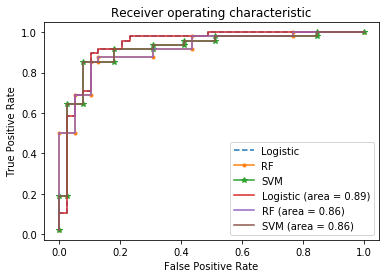

In [859]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Logit
rf_roc_auc_lr = roc_auc_score(Y_test,y_pred_lr)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(Y_test, model_lr.predict_proba(X_test)[:,1])

## Random Forest
rf_roc_auc_rf = roc_auc_score(Y_test,y_pred_rf)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(Y_test, model_rf.predict_proba(X_test)[:,1])

## SVM
rf_roc_auc_svm = roc_auc_score(Y_test,y_pred_svm)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(Y_test, model_svm.predict_proba(X_test)[:,1])

# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='Logistic')
plt.plot(rf_fpr, rf_tpr, marker='.', label='RF')
plt.plot(svm_fpr, svm_tpr, marker='*', label='SVM')

#AUC
plt.plot(lr_fpr, lr_tpr, label='Logistic (area = %0.2f)' % rf_roc_auc_lr)
plt.plot(rf_fpr, rf_tpr, label='RF (area = %0.2f)' % rf_roc_auc_rf)
plt.plot(svm_fpr, svm_tpr, label='SVM (area = %0.2f)' % rf_roc_auc_svm)

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.title('Receiver operating characteristic')
plt.show()